In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gget

custom_params = {"axes.spines.right": False, "axes.spines.top": True}
sns.set_theme(style="ticks", font_scale=0.8, rc=custom_params)
%config InlineBackend.figure_format='retina'


For Mouse:

- `mmidas-joint` = 18 : Igh, Igk family (Immunoglobin proteins)
- `mmidas-joint` = 5  : Ubiquitination  
- `mmidas-joint` = 1  : Extra-cellular processes
- `mmidas-joint` = 16 : Gpr family

For Human:

- `mmidas-joint` = 5  : IGH, IGK family
- `mmidas-joint` = 25 : GPR family

In [2]:
df = pd.read_csv("mouse_df.csv")
display(df.head(3))

,ensg_id,gene_symbol,leiden-nt,leiden-esm3,mmidas-joint,nt-umap-0,nt-umap-1,aa-umap-0,aa-umap-1
0,ENSMUSG00000018566.15,Slc2a4,8,3,9,10.830853,0.346162,14.341636,4.835434
1,ENSMUSG00000040888.12,Gfer,14,24,-1,11.152143,-4.010281,7.149468,4.560211
2,ENSMUSG00000078235.4,Fam43b,2,23,1,11.687284,1.119307,6.526957,0.824544


15:55:03 - INFO - Performing Enrichr analysis using database GO_Biological_Process_2021. 
        Please note that there might be a more appropriate database for your application. 
        Go to https://maayanlab.cloud/Enrichr/#libraries for a full list of supported databases.
        
15:55:04 - ERROR - 
            No Enrichr results were found for genes ['Ighv9-3', 'Igkv2-109', 'Ighv1-59', 'Ighv1-62-1', 'Igkv1-117', 'Ighv11-1', 'Igkv4-86', 'Igkv4-78', 'Ighv8-11', 'Ighv1-7', 'Ighv1-78', 'Igkv4-71', 'Igkv4-90', 'Igkv1-35', 'Ighv5-12-4', 'Igkv10-94', 'Ighv1-4', 'Igkv6-29', 'Ighv1-58', 'Ighv3-3', 'Igkv9-129', 'Igkv1-122', 'Ighv1-72', 'Ighv7-3', 'Igkv12-41', 'Igkv12-89', 'Ighv8-5', 'Ighv14-2', 'Igkv13-84', 'Igkv4-57', 'Igkv18-36', 'Igkv19-93', 'Igkv4-58', 'Ighv8-4', 'Ighv1-47', 'Igkv4-63', 'Ighv1-26', 'Igkv6-14', 'Gm20730', 'Igkv16-104', 'Ighv8-12', 'Igkv4-74', 'Ighv5-6', 'Igkv12-44', 'Ighv1-84', 'Ighv9-4', 'Igkv3-9', 'Ighv1-24', 'Igkv8-27', 'Ighv1-53', 'Ighv12-3', 'Igkv4-72', 'Igkv5-43'

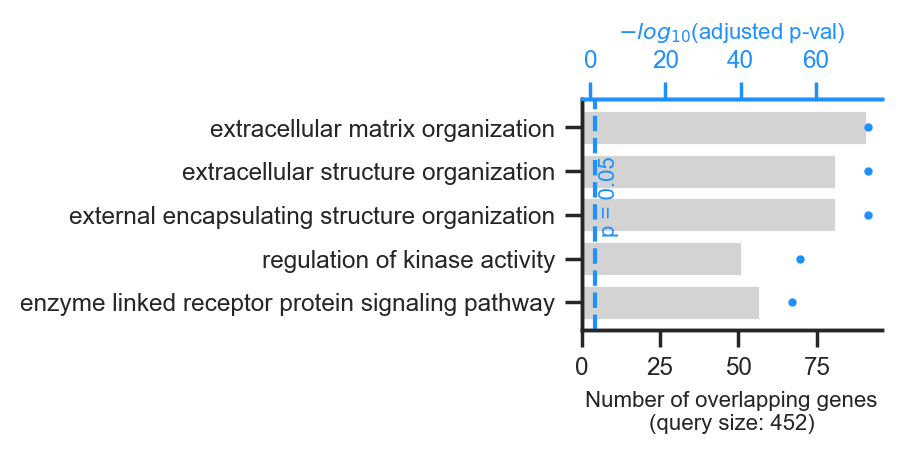

15:55:05 - INFO - Performing Enrichr analysis using database GO_Biological_Process_2021. 
        Please note that there might be a more appropriate database for your application. 
        Go to https://maayanlab.cloud/Enrichr/#libraries for a full list of supported databases.
        


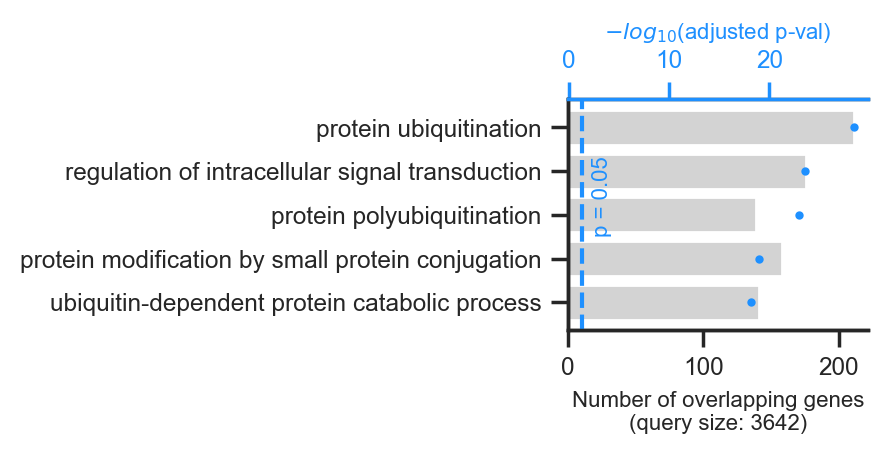

15:55:06 - INFO - Performing Enrichr analysis using database GO_Biological_Process_2021. 
        Please note that there might be a more appropriate database for your application. 
        Go to https://maayanlab.cloud/Enrichr/#libraries for a full list of supported databases.
        


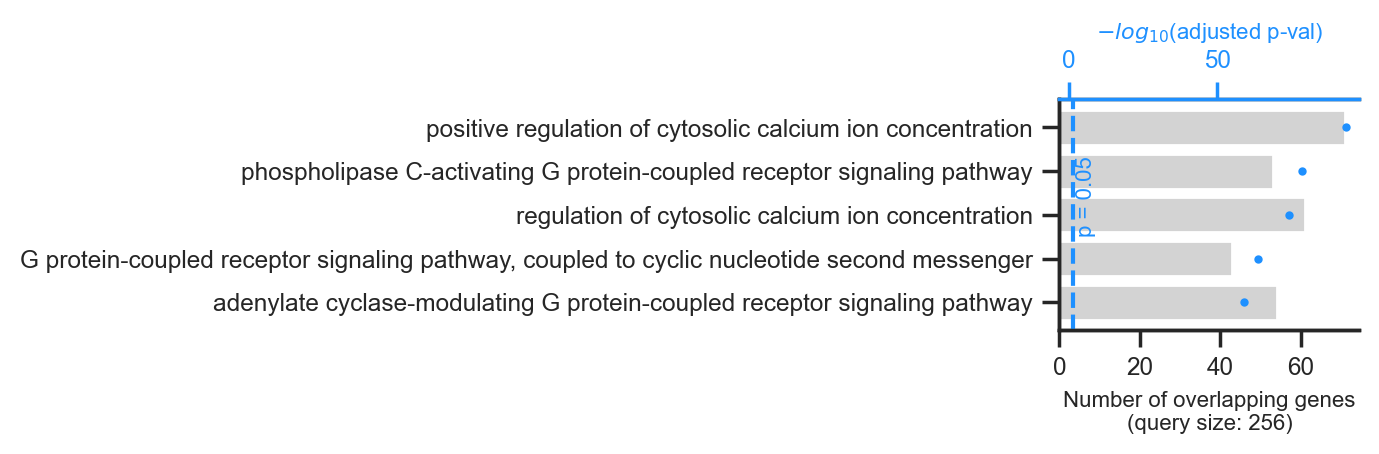

In [3]:
def plot_enrichr_res(terms, bar_heights, dot_values, query_size):
    num_terms = len(terms)
    f, ax = plt.subplots(1,1,figsize=(6, 1.5))
    plt.subplots_adjust(left=0.75, right=1.0)  


    ax.barh(terms, bar_heights, color='lightgray')
    ax.set_xlabel(f"Number of overlapping genes\n(query size: {query_size})", fontsize=8)

    # Twin x-axis for p-values (right x-axis)
    axt = ax.twiny()
    axt.scatter(dot_values, np.arange(num_terms), color='dodgerblue', s=4, label="-log10(adjusted P value)")
    axt.set_xlabel(r"$-log_{10}$(adjusted p-val)", color='dodgerblue', fontsize=8)
    axt.spines['top'].set_color('dodgerblue')
    axt.tick_params(axis='x', colors='dodgerblue')

    # Add significance line
    axt.axvline(x=-np.log10(0.05), color='dodgerblue', linestyle='dashed')
    axt.text(-np.log10(0.05)+ 0.8*(-np.log10(0.05)), 2.5, "p = 0.05", verticalalignment='bottom', color='dodgerblue', rotation=90, size=8)

    plt.gca().invert_yaxis()  
    #plt.tight_layout()
    plt.show()
    return


topk = 5
mmidas_labels = [18,5,1,16]
for label in mmidas_labels:


    gene_list = df[df["mmidas-joint"]==label]["gene_symbol"].to_list()
    background_list = df[df["mmidas-joint"]!=label]["gene_symbol"].to_list()
    df_res = gget.enrichr(gene_list, database="ontology", plot=False)
    df_res = df_res[:topk].copy()

    terms = df_res["path_name"].to_list()
    terms = [txt.split("(GO")[0].strip() for txt in terms]
    terms = [txt.replace("\n", "") for txt in terms]

    query_size = len(gene_list)
    bar_heights = df_res["overlapping_genes"].map(len).values
    dot_values = -np.log10(df_res["adj_p_val"].values)

    if len(terms) > 0:
        plot_enrichr_res(terms, bar_heights, dot_values, query_size)

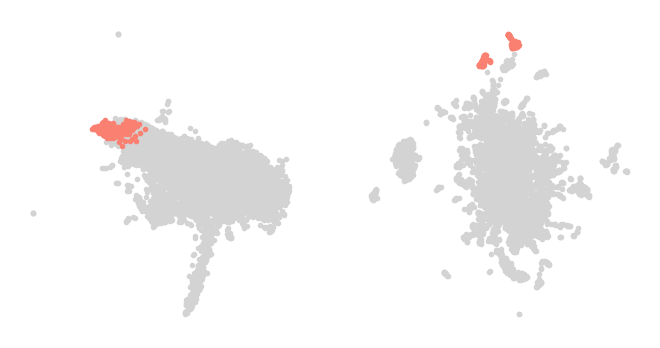

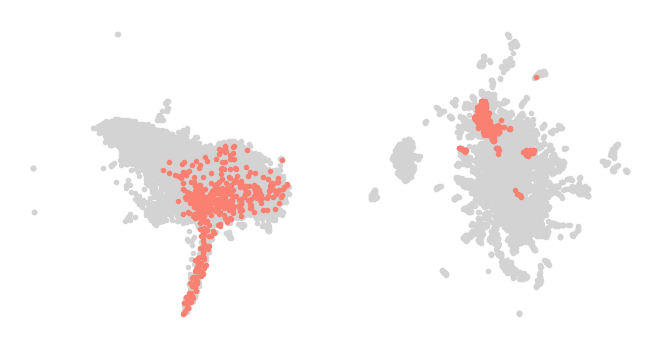

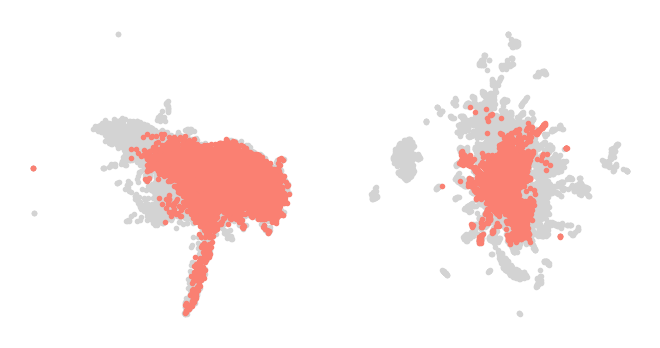

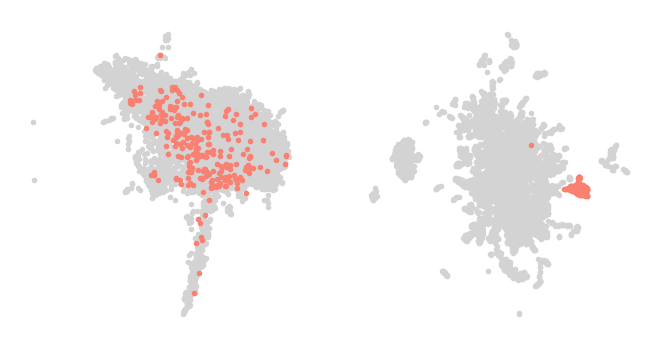

In [4]:
for label in mmidas_labels:
    df_this = df[df["mmidas-joint"]==label]
    df_rest = df[df["mmidas-joint"]!=label].sample(n=5000)

    f, ax = plt.subplots(1, 2, figsize=(4, 2))
    ax[0].scatter(df_rest["nt-umap-0"], df_rest["nt-umap-1"], s=1, c="lightgray")
    ax[0].scatter(df_this["nt-umap-0"], df_this["nt-umap-1"], s=1, c="salmon")
    ax[1].scatter(df_rest["aa-umap-0"], df_rest["aa-umap-1"], s=1, c="lightgray")
    ax[1].scatter(df_this["aa-umap-0"], df_this["aa-umap-1"], s=1, c="salmon")
    ax[0].axis("off")
    ax[1].axis("off")
    plt.show()

In [5]:
gene_list = df[df["mmidas-joint"]==18]["gene_symbol"].to_list()
# put genes one per line in a text file for manual upload to https://geneontology.org/
with open("mmidas-joint-18-genes.txt", "w") as f:
    for g in gene_list:
        f.write(g + "\n")

Manually copied over analysis for Mouse `mmidas-joint-18`:

| GO Term | REFLIST (21836) | upload_1 (208) | Expected | Over/Under | Fold Enrichment | Raw P-value | FDR |
|---------|---------------|---------------|----------|------------|----------------|-------------|-------------|
| **Immunoglobulin mediated immune response (GO:0016064)** | 267 | 91 | 2.54 | + | 35.78 | 4.99E-122 | 1.92E-118 |
| **B cell mediated immunity (GO:0019724)** | 273 | 91 | 2.60 | + | 34.99 | 5.65E-121 | 1.74E-117 |
| **Lymphocyte mediated immunity (GO:0002449)** | 357 | 91 | 3.40 | + | 26.76 | 1.19E-108 | 3.06E-105 |
| **Adaptive immune response based on somatic recombination of immune receptors built from immunoglobulin superfamily domains (GO:0002460)** | 367 | 91 | 3.50 | + | 26.03 | 2.03E-107 | 4.48E-104 |
| **Leukocyte mediated immunity (GO:0002443)** | 417 | 91 | 3.97 | + | 22.91 | 8.48E-102 | 1.63E-98 |



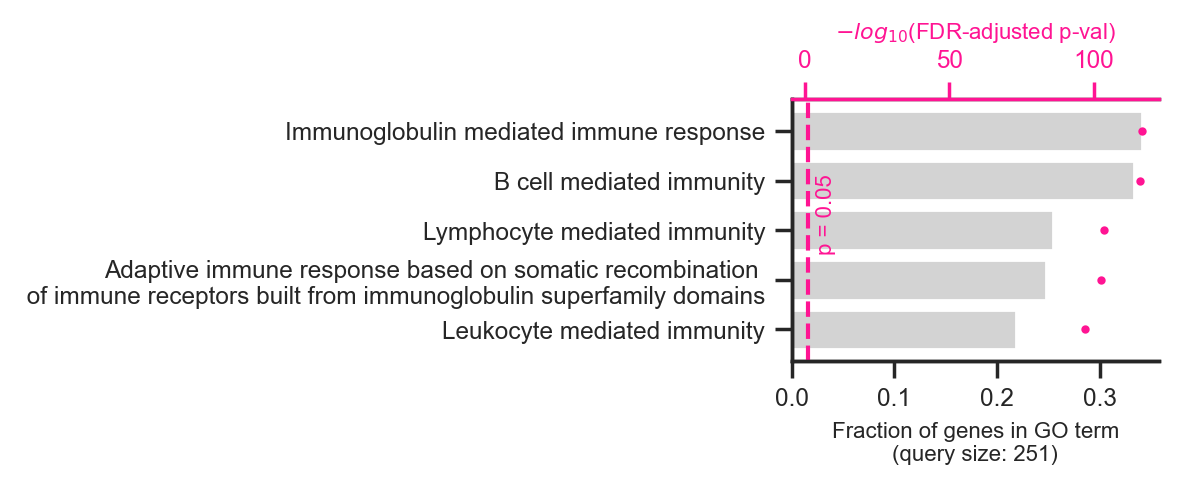

In [6]:
# manually extracted rows:
terms = [
    "Immunoglobulin mediated immune response", 
    "B cell mediated immunity", 
    "Lymphocyte mediated immunity", 
    "Adaptive immune response based on somatic recombination \n of immune receptors built from immunoglobulin superfamily domains", 
    "Leukocyte mediated immunity"]
dot_values = -np.log10(np.array([1.92*10e-118, 1.74*10e-117, 3.06*10e-105, 4.48*10e-104, 1.63*10e-98]))
bar_heights = 91/np.array([267, 273, 357, 367, 417])
query_size = 251
num_terms = np.size(dot_values)

f, ax = plt.subplots(1,1,figsize=(6, 2.5))
plt.subplots_adjust(left=0.75, right=1.0)  
ax.barh(terms, bar_heights, color='lightgray')
ax.set_xlabel(f"Fraction of genes in GO term\n(query size: {query_size})", fontsize=8)

# Twin x-axis for p-values (right x-axis)
axt = ax.twiny()
axt.scatter(dot_values, np.arange(num_terms), color='deeppink', s=4, label="-log10(FDR-adjusted P value)")
axt.set_xlabel(r"$-log_{10}$(FDR-adjusted p-val)", color='deeppink', fontsize=8)
axt.spines['top'].set_color('deeppink')
axt.tick_params(axis='x', colors='deeppink')

# Add significance line
axt.axvline(x=-np.log10(0.05), color='deeppink', linestyle='dashed')
axt.text(-np.log10(0.05)+ 2.0*(-np.log10(0.05)), 2.5, "p = 0.05", verticalalignment='bottom', color='deeppink', rotation=90, size=8)
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()
